# Color Extraction and Image Segmentation

In [51]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

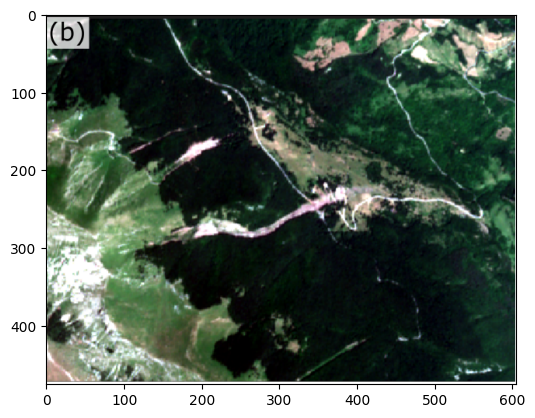

(287980, 3)


In [52]:
im = cv2.imread("5.png")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(im)
plt.show()
reshaped_im = im.reshape((-1, 3))
print(reshaped_im.shape)

In [53]:
k = 3
kmeans = KMeans(k)

In [54]:
kmeans.fit(reshaped_im)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [55]:
dominant_colors = kmeans.cluster_centers_.astype('uint8')
dominant_colors

array([[ 12,  28,  21],
       [ 93, 118,  88],
       [205, 207, 197]], dtype=uint8)

In [56]:
np.zeros_like(reshaped_im).shape

(287980, 3)

In [57]:
kmeans.labels_

array([0, 0, 0, ..., 2, 2, 2])

(476, 605, 3)


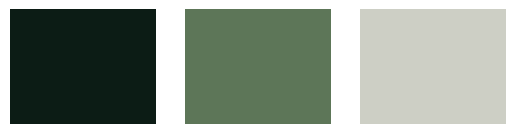

In [58]:
plt.figure()
for i,color in enumerate(dominant_colors):
    palette = np.zeros_like(im, dtype='uint8')
    palette[:,:,:] = color
    plt.subplot(1,k,i+1)
    plt.axis("off")
    plt.imshow(palette)
print(im.shape)    

In [62]:
new_img = np.zeros((im.shape[0]*im.shape[1],3),dtype='uint8')
print(new_img.shape)
print(kmeans.labels_)

(287980, 3)
[0 0 0 ... 2 2 2]


In [70]:
colors = []

for i in kmeans.labels_:
  if i == 0:
    colors.append('blue')
  elif i == 1:
    colors.append('orange')
  elif i == 2:
    colors.append('red')

In [71]:
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[kmeans.labels_[ix]]
    
new_img = new_img.reshape((im.shape))
plt.imshow(new_img)
plt.show()

ValueError: invalid literal for int() with base 10: '(255, 50 , 0)'